In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from datetime import timedelta
from keras import backend as K
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.losses import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
train_df = pd.read_csv('/kaggle/input/predict-test-scores-of-students/test_scores.csv')
train_df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [3]:
train_df.isna().any()

school             False
school_setting     False
school_type        False
classroom          False
teaching_method    False
n_student          False
student_id         False
gender             False
lunch              False
pretest            False
posttest           False
dtype: bool

In [4]:
X = train_df.copy()

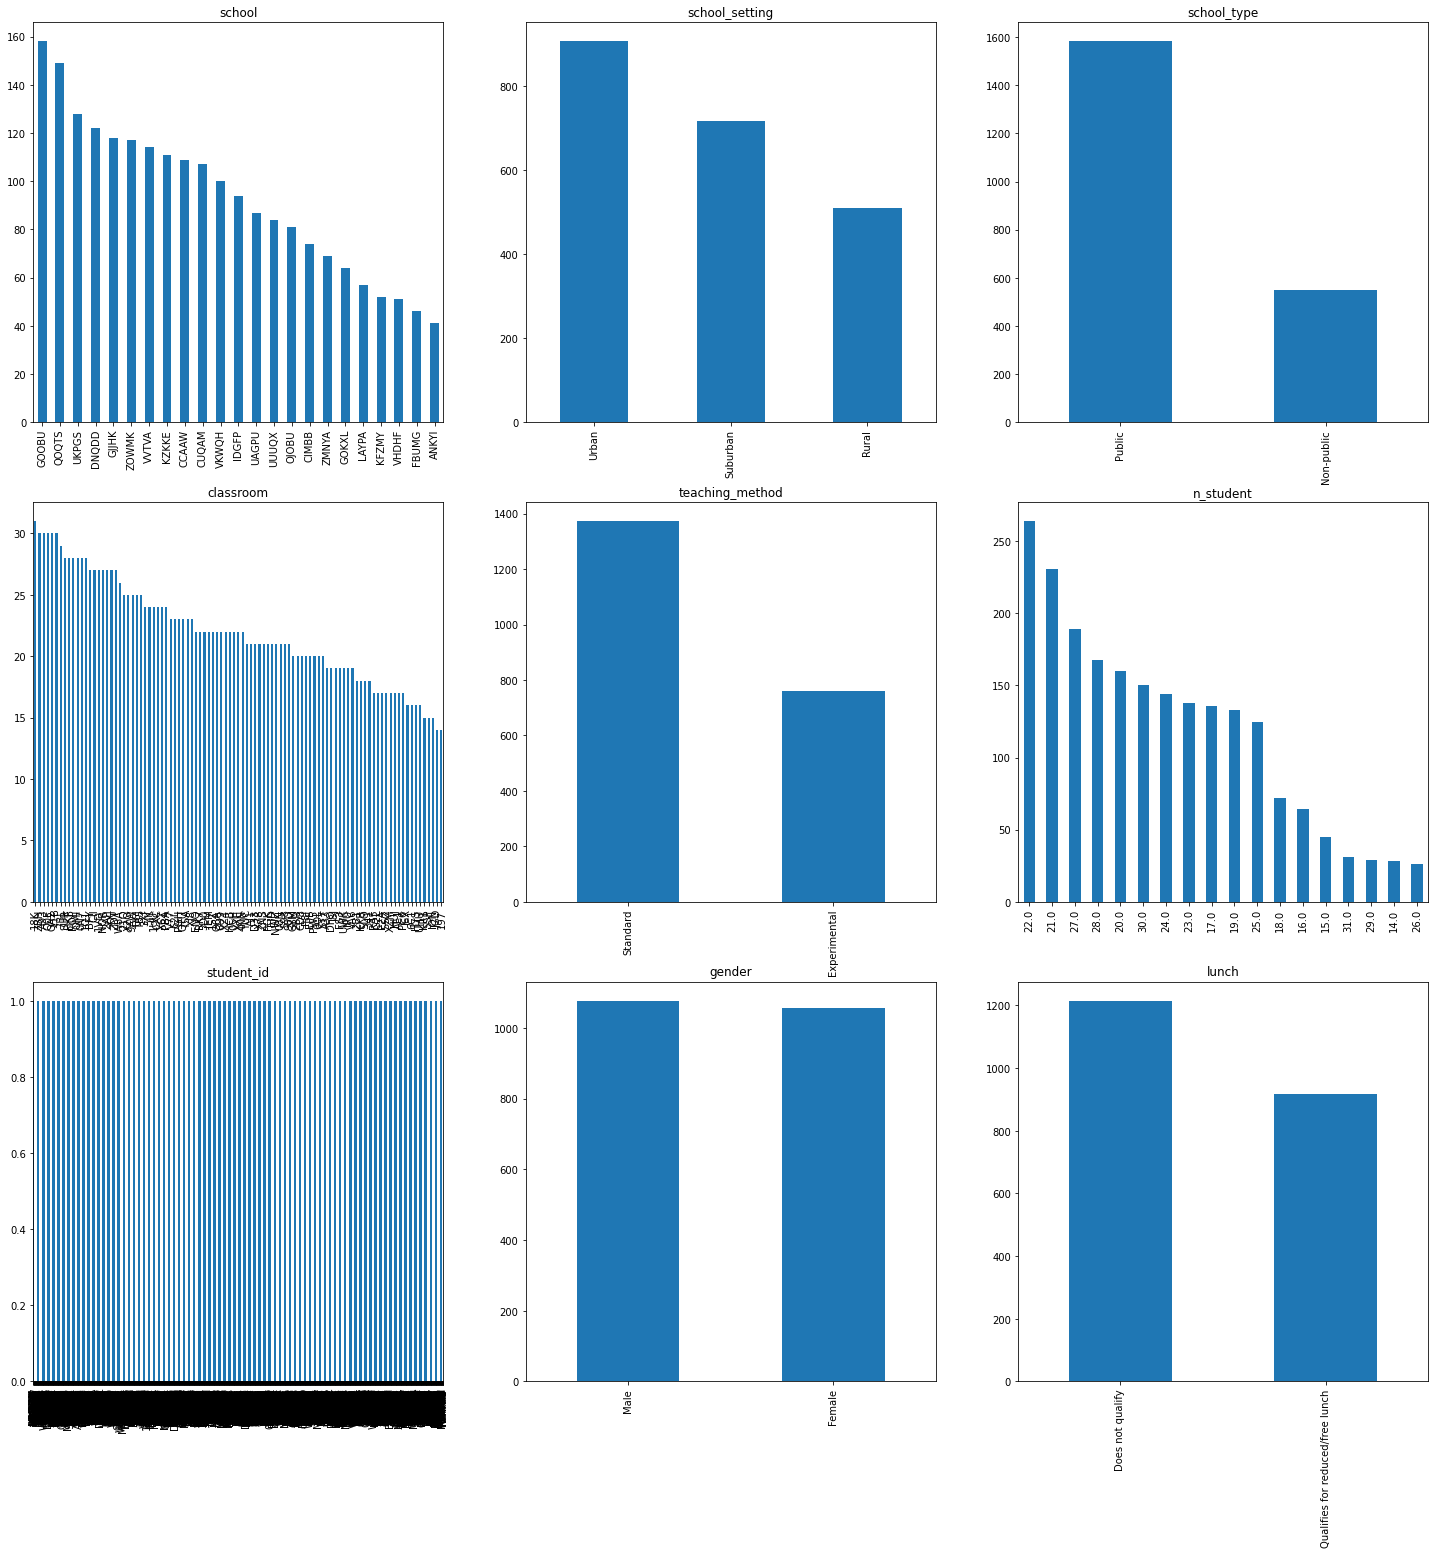

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(25, 25))

i = 0
j = 0
for colname in X:
    X[colname].value_counts().plot(ax=axes[i, j], legend=False, kind='bar')
    axes[i, j].set_title(colname)
    if j == 2:
        j = 0
        i = i + 1
        if i == 3:
            break;
    else:
        j = j + 1

In [6]:
def test_mean(item_cat, item_value):
    arr = []
    for item in item_value:
        x = X.posttest[X[item_cat]==item].mean()
        arr.append(x)
    return arr

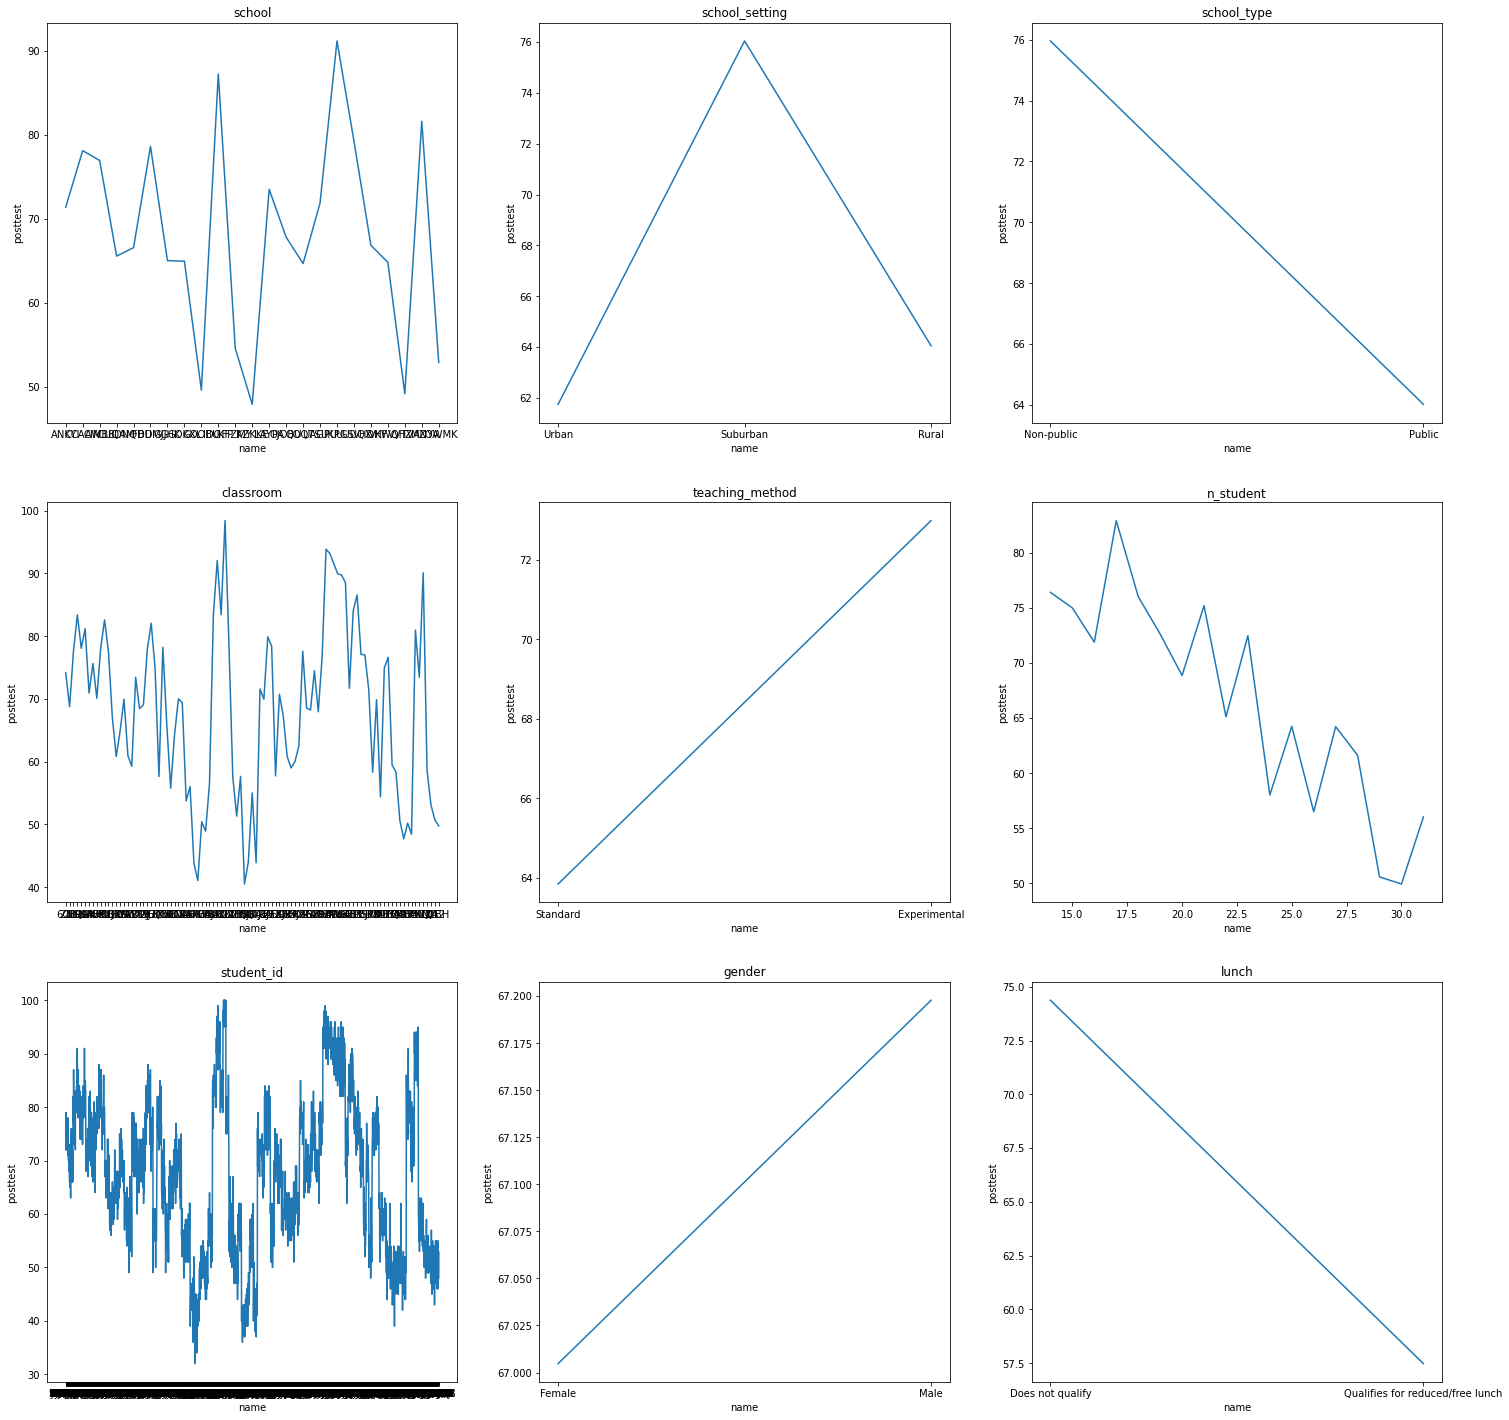

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(25, 25))

i = 0
j = 0
for colname in X:
    df_ss = pd.DataFrame()
    df_ss['name'] = X[colname].unique()
    df_ss['posttest'] = test_mean(colname, df_ss.name)
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='name', y ='posttest', data=df_ss, ax=axes[i, j])
    axes[i, j].set_title(colname)
    if j == 2:
        j = 0
        i = i + 1
        if i == 3:
            break;
    else:
        j = j + 1

In [8]:
y = train_df['posttest']
X = train_df.drop('posttest', axis=1)

In [9]:
object_cols = [col for col in X.columns if X[col].dtype=='object']
object_cols

['school',
 'school_setting',
 'school_type',
 'classroom',
 'teaching_method',
 'student_id',
 'gender',
 'lunch']

In [10]:
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.33)

In [12]:
LR = LinearRegression()
LR.fit(train_x, train_y)

LinearRegression()

In [13]:
prediction = LR.predict(test_x)

In [14]:
mean_absolute_error(test_y, prediction)

2.692097978898087

In [15]:
r2_score(test_y, prediction)

0.9428197372902721

In [16]:
mean_squared_error(test_y, prediction)

11.108446980262777